In [56]:
#import libraries 
import pandas as pd 
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [57]:

#load in dataset 

heart = "/Users/mcall/OneDrive/Desktop/Humber/BINF5507/5507/5507/Assignment_2/Data/heart_disease_uci.csv"
heart_df = pd.read_csv(heart)

# Display the first few rows of the dataset
print(heart_df.head())

   num  age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0    0   63    1   1       145   233    1        2      150      0      2.3   
1    2   67    1   4       160   286    0        2      108      1      1.5   
2    1   67    1   4       120   229    0        2      129      1      2.6   
3    0   37    1   3       130   250    0        0      187      0      3.5   
4    0   41    0   2       130   204    0        2      172      0      1.4   

   slope   ca  thal  
0      3  0.0   6.0  
1      2  3.0   3.0  
2      2  2.0   7.0  
3      3  0.0   3.0  
4      1  0.0   3.0  


The following cells will go over regresson for predicting cholesterol levels 

In [58]:
#Regression: Predicting cholesterol levels

X = heart_df.drop(columns=['chol'])  # Features (everything except 'chol')
y = heart_df['chol']  # Target for regression

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split the data into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize lists to store R2 and RMSE values
alphas = np.logspace(-1, 2, 10)  # Range for alpha
l1_ratios = np.linspace(0, 1, 10)  # Range for l1_ratio

r2_scores = []
rmse_scores = []

# Loop through combinations of alpha and l1_ratio
for alpha in alphas:
    for l1_ratio in l1_ratios:
        elasticnet_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000)  # Increased max_iter
        elasticnet_model.fit(X_train, y_train)
        y_pred = elasticnet_model.predict(X_test)
        
        # Calculate R² and RMSE
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        
        r2_scores.append(r2)
        rmse_scores.append(rmse)

# Convert the scores to numpy arrays for easier reshaping
r2_scores = np.array(r2_scores).reshape(len(alphas), len(l1_ratios))
rmse_scores = np.array(rmse_scores).reshape(len(alphas), len(l1_ratios))



c:\Users\mcall\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.541e+05, tolerance: 5.614e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\mcall\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.565e+05, tolerance: 5.614e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

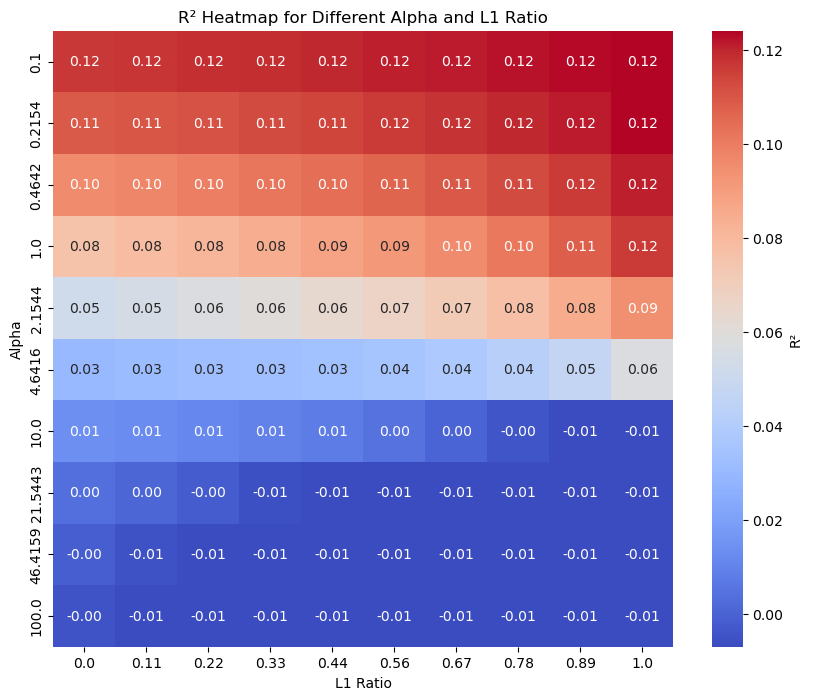

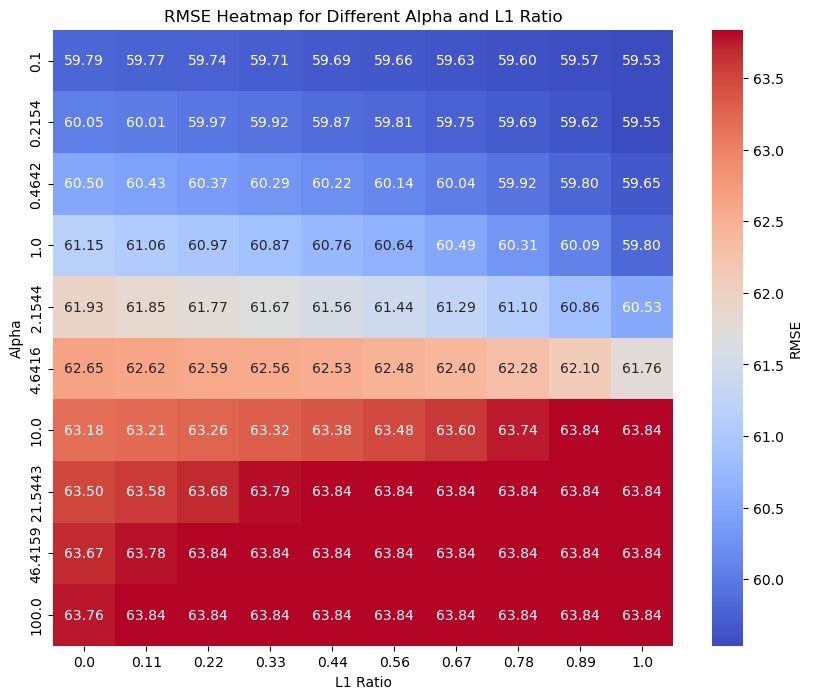

In [59]:
#create heatmaps 


# Plot R² Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(r2_scores, xticklabels=np.round(l1_ratios, 2), yticklabels=np.round(alphas, 4), cmap='coolwarm', annot=True, fmt='.2f', cbar_kws={'label': 'R²'})
plt.title("R² Heatmap for Different Alpha and L1 Ratio")
plt.xlabel("L1 Ratio")
plt.ylabel("Alpha")
plt.show()

# Plot RMSE Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(rmse_scores, xticklabels=np.round(l1_ratios, 2), yticklabels=np.round(alphas, 4), cmap='coolwarm', annot=True, fmt='.2f', cbar_kws={'label': 'RMSE'})
plt.title("RMSE Heatmap for Different Alpha and L1 Ratio")
plt.xlabel("L1 Ratio")
plt.ylabel("Alpha")
plt.show()


In [60]:
#extracting best configurations for R^2 and RMSE 

# Find the best performing combination for R²
best_r2_idx = np.unravel_index(np.argmax(r2_scores), r2_scores.shape)
best_alpha_r2 = alphas[best_r2_idx[0]]
best_l1_ratio_r2 = l1_ratios[best_r2_idx[1]]
best_r2_value = r2_scores[best_r2_idx]

# Find the best performing combination for RMSE
best_rmse_idx = np.unravel_index(np.argmin(rmse_scores), rmse_scores.shape)
best_alpha_rmse = alphas[best_rmse_idx[0]]
best_l1_ratio_rmse = l1_ratios[best_rmse_idx[1]]
best_rmse_value = rmse_scores[best_rmse_idx]

# Print the best configurations
print(f"Best R² Configuration: alpha = {best_alpha_r2}, l1_ratio = {best_l1_ratio_r2}, R² = {best_r2_value:.4f}")
print(f"Best RMSE Configuration: alpha = {best_alpha_rmse}, l1_ratio = {best_l1_ratio_rmse}, RMSE = {best_rmse_value:.4f}")


Best R² Configuration: alpha = 0.1, l1_ratio = 1.0, R² = 0.1242
Best RMSE Configuration: alpha = 0.1, l1_ratio = 1.0, RMSE = 59.5349


data = pd.read_csv('/Users/mcall/OneDrive/Desktop/Humber/BINF5507/5507/5507/Assignment_2/Data/heart_disease_uci.csv')

Logistic Regression Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression Accuracy: 0.8524590163934426
Logistic Regression F1 Score: 0.8571428571428571
Logistic Regression ROC AUC Score: 0.8529094827586207
Logistic Regression Average Precision Score: 0.8168462453728186


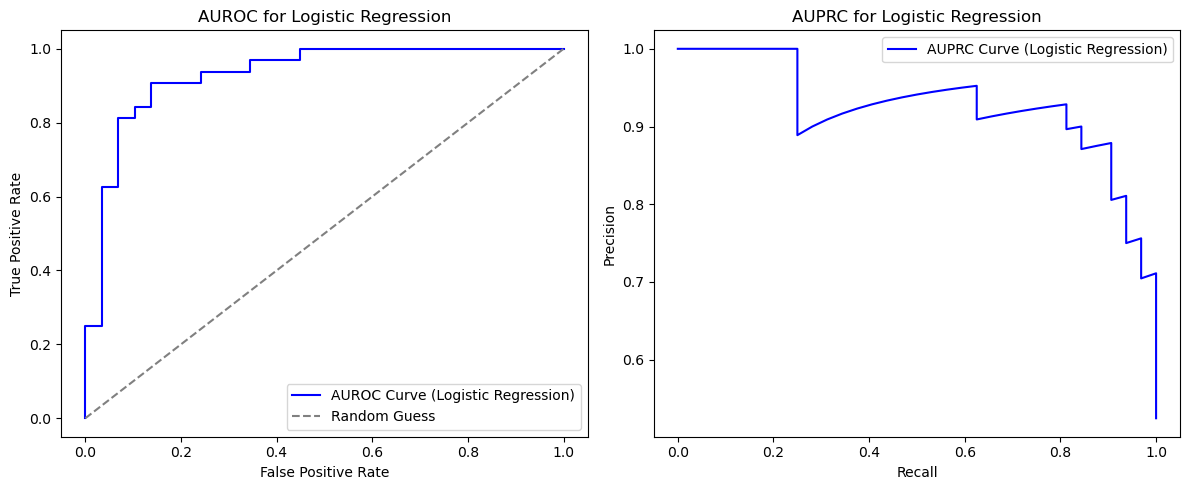

k-NN Best Parameters: {'metric': 'manhattan', 'n_neighbors': 10}
k-NN Accuracy: 0.9016393442622951
k-NN F1 Score: 0.9
k-NN ROC AUC Score: 0.9046336206896551
k-NN Average Precision Score: 0.8955832845433255


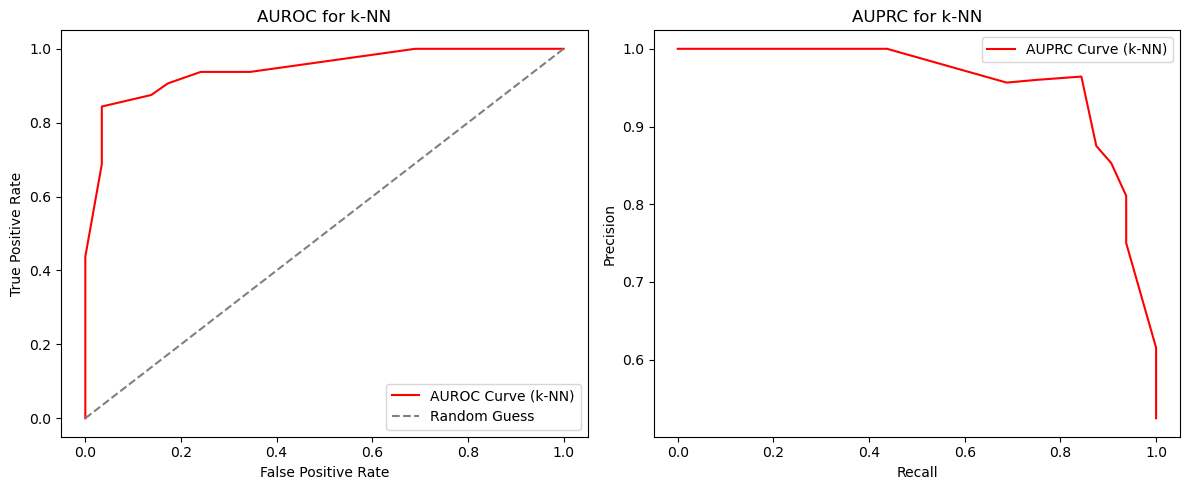

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, average_precision_score, roc_curve, precision_recall_curve
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv('/Users/mcall/OneDrive/Desktop/Humber/BINF5507/5507/5507/Assignment_2/Data/heart_disease_uci.csv')

# Convert the 'num' target column to binary (1 for presence of heart disease, 0 for absence)
data['num'] = data['num'].apply(lambda x: 1 if x > 0 else 0)

# Features and target
X = data.drop(columns=['num'])
y = data['num']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values by imputing the median for each column
imputer = SimpleImputer(strategy='median')

# Apply imputation on both training and test sets
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale the data after imputation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

#-------------------------- Logistic Regression --------------------------
# Set parameters for Logistic Regression
logreg = LogisticRegression(max_iter=10000)

logreg_params = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

logreg_grid = GridSearchCV(logreg, logreg_params, cv=5, scoring='accuracy')
logreg_grid.fit(X_train_scaled, y_train)

# Get the best logistic regression model
logreg_best = logreg_grid.best_estimator_

# Predictions for Logistic Regression
y_pred_logreg = logreg_best.predict(X_test_scaled)

# Evaluation metrics for Logistic Regression
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_pred_logreg)
average_precision_logreg = average_precision_score(y_test, y_pred_logreg)

print("Logistic Regression Best Parameters:", logreg_grid.best_params_)
print(f"Logistic Regression Accuracy: {accuracy_logreg}")
print(f"Logistic Regression F1 Score: {f1_logreg}")
print(f"Logistic Regression ROC AUC Score: {roc_auc_logreg}")
print(f"Logistic Regression Average Precision Score: {average_precision_logreg}")

# Plot AUROC and AUPRC for Logistic Regression
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg_best.predict_proba(X_test_scaled)[:, 1])
precision_logreg, recall_logreg, _ = precision_recall_curve(y_test, logreg_best.predict_proba(X_test_scaled)[:, 1])

plt.figure(figsize=(12, 5))

# AUROC Plot
plt.subplot(1, 2, 1)
plt.plot(fpr_logreg, tpr_logreg, color='b', label='AUROC Curve (Logistic Regression)')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.title('AUROC for Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# AUPRC Plot
plt.subplot(1, 2, 2)
plt.plot(recall_logreg, precision_logreg, color='b', label='AUPRC Curve (Logistic Regression)')
plt.title('AUPRC for Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

plt.tight_layout()
plt.show()

#-------------------------- k-NN Classifier --------------------------
# Set parameters for k-NN
knn = KNeighborsClassifier()

knn_params = {
    'n_neighbors': [1, 5, 10],
    'metric': ['euclidean', 'manhattan']
}

knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train_scaled, y_train)

# Get the best k-NN model
knn_best = knn_grid.best_estimator_

# Predictions for k-NN
y_pred_knn = knn_best.predict(X_test_scaled)

# Evaluation metrics for k-NN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_knn)
average_precision_knn = average_precision_score(y_test, y_pred_knn)

print("k-NN Best Parameters:", knn_grid.best_params_)
print(f"k-NN Accuracy: {accuracy_knn}")
print(f"k-NN F1 Score: {f1_knn}")
print(f"k-NN ROC AUC Score: {roc_auc_knn}")
print(f"k-NN Average Precision Score: {average_precision_knn}")

# Plot AUROC and AUPRC for k-NN
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_best.predict_proba(X_test_scaled)[:, 1])
precision_knn, recall_knn, _ = precision_recall_curve(y_test, knn_best.predict_proba(X_test_scaled)[:, 1])

plt.figure(figsize=(12, 5))

# AUROC Plot
plt.subplot(1, 2, 1)
plt.plot(fpr_knn, tpr_knn, color='r', label='AUROC Curve (k-NN)')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.title('AUROC for k-NN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# AUPRC Plot
plt.subplot(1, 2, 2)
plt.plot(recall_knn, precision_knn, color='r', label='AUPRC Curve (k-NN)')
plt.title('AUPRC for k-NN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

plt.tight_layout()
plt.show()
